# Lec10: Machine Learning with Scikit-learn

Procedures:
1. Choose a method and import from Scikit-Learn.
2. Choose model hyperparameters (if needed) by instantiating this class with desired values.
3. Arrange data into a features matrix and a target array.
4. Fit the model to data by calling the fit() method of the model instance.
5. Apply the model to new data: <br>
• For supervised learning, predict labels for unknown data using the predict() method. <br>
• For unsupervised learning, transform or infer properties of new data using the transform() or predict() method.

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

#### Feature Matrix
[n_samples, n_features]

In [5]:
print(iris.iloc[:,0:-1].shape)
iris.iloc[:,0:-1]

(150, 4)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### Target Array
[n_samples, n_targets]

In [6]:
iris.iloc[:,-1]

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

#### Data Exploration
Use plots effectively:

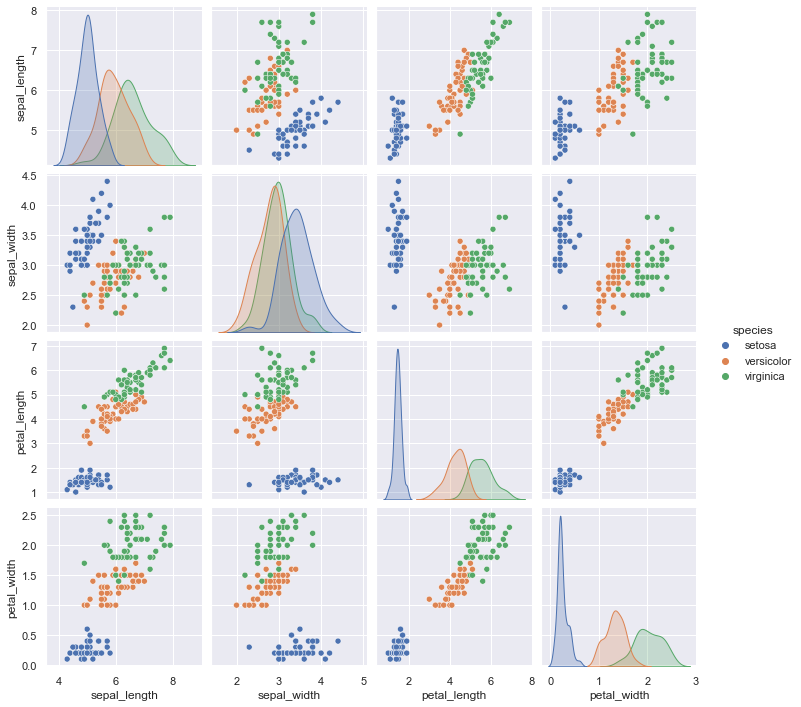

In [7]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species');

#### Scikit-Learn: extract the features matrix and target array 

Pandas DataFrame operations can be applied.

In [8]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [9]:
y_iris = iris['species']
y_iris.shape

(150,)

### Supervised learning example: simple linear regression

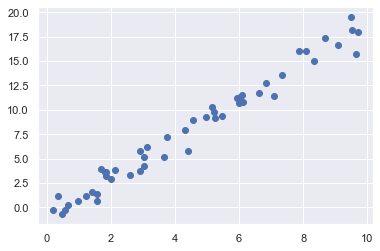

In [10]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

1. Choose a class of model.
In Scikit-Learn, every class of model is represented by a Python class. For simple linear regression model, import the linear regression class:

In [11]:
from sklearn.linear_model import LinearRegression

2. Choose model hyperparameters. <br>
Once we have decided on our model class, there are still some options open to us. <br>
Depending on the model class we are working with, we might need to answer one or more questions like the following: <br>
• Would we like to fit for the offset (i.e., intercept)? <br>
• Would we like the model to be normalized? <br>
• Would we like to preprocess our features to add model flexibility? <br>
• What degree of regularization would we like to use in our model? <br>
• How many model components would we like to use? <br>

In [12]:
LinearRegression?

In [13]:
model = LinearRegression()
model

LinearRegression()

3. Arrange data into a features matrix and target vector.
two-dimensional features matrix and a one-dimensional target array

In [14]:
x.shape

(50,)

In [15]:
#y in the correct form (a length-n_samples array)
# make x a matrix of size [n_samples, n_features].
X = x[:, np.newaxis]
X.shape

(50, 1)

4. Fit the model to your data.

In [16]:
model.fit(X, y)

LinearRegression()

Check the slope and the intercept of the simple linear fit to the data:

In [17]:
print(model.coef_)
print(model.intercept_)

[1.9776566]
-0.903310725531111


In [18]:
model?

5. Predict labels for unknown data. <br>
Coerce new x values into a [n_samples, n_features] features matrix, after which we can feed it to the model:

In [19]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
Xfit.shape

(50, 1)

In [20]:
yfit = model.predict(Xfit)

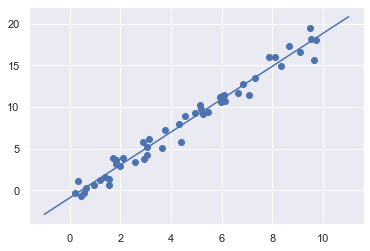

In [21]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

### Supervised learning example: classification

In [22]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [23]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [24]:
train_test_split?

In [52]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB() # 2. instantiate model
model.fit(Xtrain, ytrain) # 3. fit model to data
y_model = model.predict(Xtest) # 4. predict on new data
y_model

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 3, 6, 7, 9, 0, 0, 5, 8, 6, 3, 0, 2, 3, 4, 1, 9,
       8, 6, 8, 8, 8, 3, 5, 1, 2, 1, 2, 1, 9, 7, 1, 3, 6, 0, 5, 3, 7, 5,
       1, 8, 9, 9, 3, 1, 7, 7, 4, 8, 5, 1, 5, 5, 8, 5, 8, 0, 7, 1, 7, 7,
       3, 4, 8, 9, 7, 7, 8, 1, 6, 5, 8, 5, 5, 4, 1, 7, 0, 6, 8, 5, 8, 1,
       1, 5, 9, 9, 5, 7, 5, 6, 8, 8, 6, 7, 6, 1, 5, 1, 7, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 7, 7, 6, 7, 6, 5, 6, 0, 8, 8, 3, 8, 6, 1, 0, 7, 1, 6,
       3, 8, 6, 7, 4, 3, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 7, 0, 1, 4, 6, 4, 3, 8, 0, 9, 5, 3, 1, 1, 4, 8, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 8, 3, 3, 1, 6, 9, 8, 6, 3, 1, 2, 0, 7, 6, 1, 1,
       8, 7, 1, 7, 1, 5, 5, 7, 5, 3, 8, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 1, 6, 8, 8, 8, 4, 6, 7, 5, 2, 1,
       7, 3, 8, 4, 6, 9, 4, 5, 7, 3, 4, 6, 2, 8, 0,

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

### Unsupervised learning example: dimension reduction

In [27]:
from sklearn.decomposition import PCA # 1. Choose the model class
model = PCA(n_components=2) # 2. Instantiate the model with hyperparameters
model.fit(X_iris) # 3. Fit to data. Notice y is not specified!

PCA(n_components=2)

In [28]:
X_2D = model.transform(X_iris) # 4. Transform the data to two dimensions

In [29]:
model.transform?

In [30]:
sns.lmplot?

d:\source\sdsc2001\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


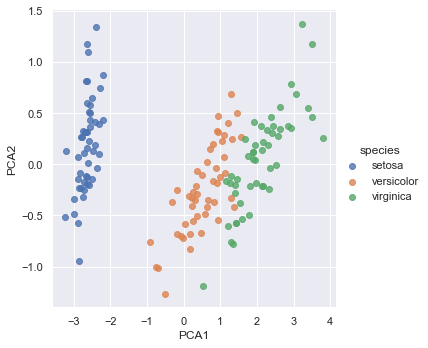

In [31]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

### Unsupervised learning example: clustering

In [32]:
from sklearn.mixture import GaussianMixture # 1. Choose the model class
model = GaussianMixture(n_components=3) # 2. Instantiate the model w/ hyperparameters
model.fit(X_iris) # 3. Fit to data. Notice y is not specified!

GaussianMixture(n_components=3)

In [33]:
GaussianMixture?

In [34]:
y_gmm = model.predict(X_iris) # 4. Determine cluster labels

d:\source\sdsc2001\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


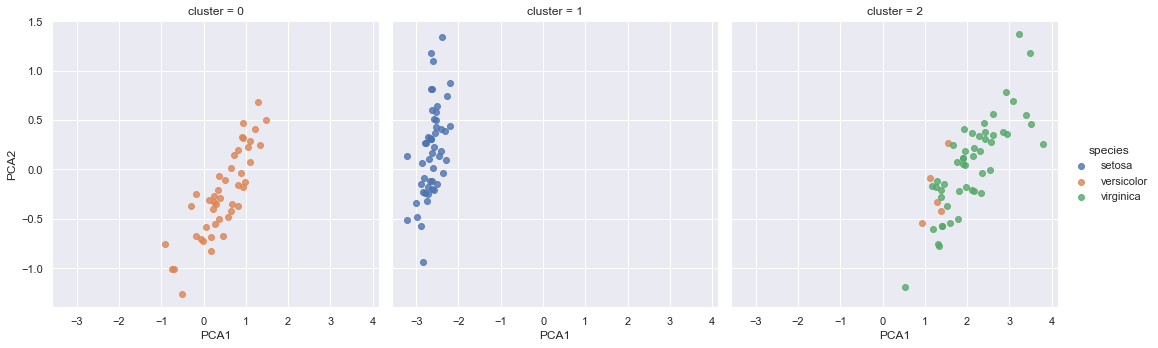

In [35]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

### Application: Exploring Handwritten Digits

#### Loading and visualizing the digits data

In [36]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [37]:
digits.target.shape

(1797,)

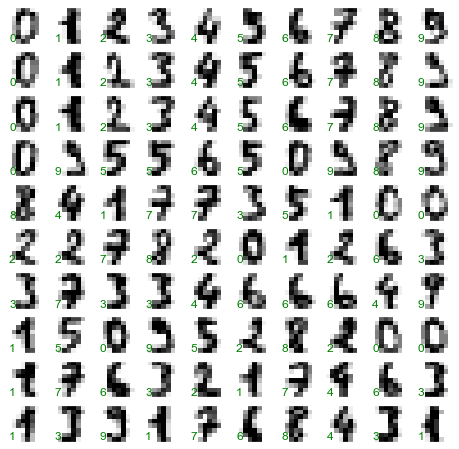

In [38]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8)
                         ,subplot_kw={'xticks':[], 'yticks':[]}
                         )
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [39]:
X = digits.data
X.shape

(1797, 64)

In [40]:
y = digits.target
y.shape

(1797,)

#### Dimension reduction: manifold learning algorithm

In [41]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

d:\source\sdsc2001\venv\lib\site-packages\sklearn\manifold\_isomap.py:302: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
d:\source\sdsc2001\venv\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

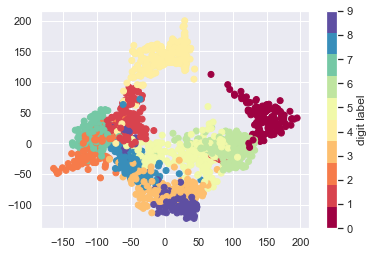

In [42]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10));

#### Classification

In [43]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

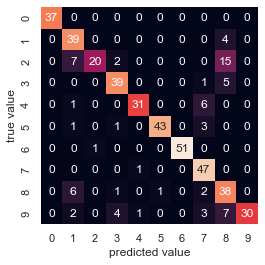

In [44]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

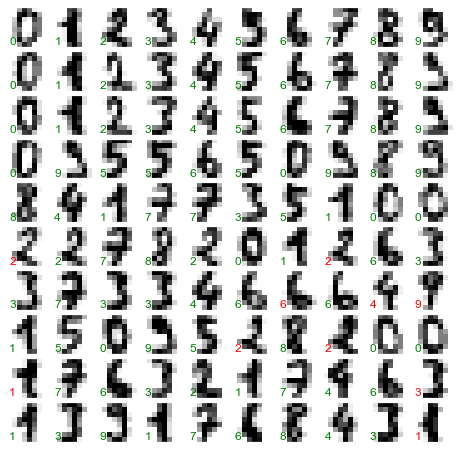

In [45]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.1, wspace=0.1))
    
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green' if (ytest[i] == y_model[i]) else 'red')

### Model selection example: cross-validation and bias variance trade-off

#### Polynomial regression

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

# **kwargs are mostly used in function definitions
# allow you to pass an unspecified number of arguments to a function
# so when writing the function definition, you do not need to know 
# how many arguments will be passed to your function

In [47]:
import numpy as np
def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y
X, y = make_data(40)

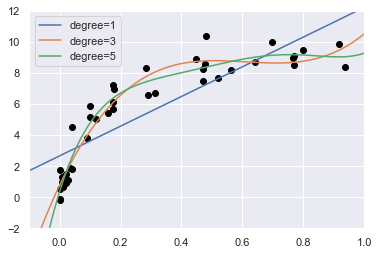

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # plot formatting
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

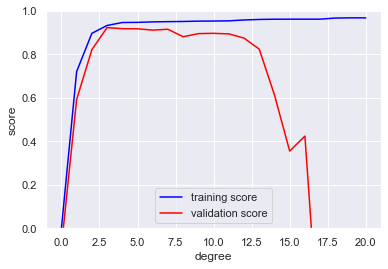

In [49]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          param_name='polynomialfeatures__degree', param_range=degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

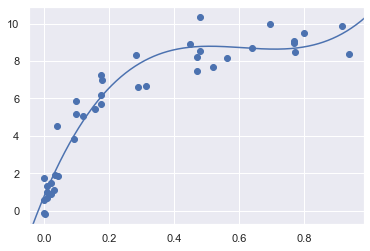

In [50]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);